In [47]:
import pandas as pd
import numpy as np

In [64]:
behavior = pd.read_csv('behavior_647.csv', index_col = 'Subject')
freesurfer = pd.read_csv('freesurfer_647.csv', index_col = 'Subject')

In [65]:
print(behavior.shape, freesurfer.shape)

(647, 382) (647, 199)


In [91]:
negative = behavior.loc[:,'AngAffect_Unadj':'Sadness_Unadj']
psychological = behavior.loc[:,'LifeSatisf_Unadj':'PosAffect_Unadj']
social = behavior.loc[:,'Friendship_Unadj':'InstruSupp_Unadj']
stress = behavior.loc[:,'PercStress_Unadj':'SelfEff_Unadj']

In [71]:
negative.head()

,AngAffect_Unadj,AngHostil_Unadj,AngAggr_Unadj,FearAffect_Unadj,FearSomat_Unadj,Sadness_Unadj
Subject,,,,,,
100307,46.9,60.8,43.4,53.9,47.2,53.4
100408,50.6,42.8,59.9,55.1,54.7,49.9
100610,47.5,49.1,43.4,49.6,55.3,44.2
101006,59.0,49.0,49.8,49.3,40.1,48.7
101107,51.9,52.3,77.2,48.4,61.4,48.1


In [53]:
data = pd.read_csv("structural_neuroimaging.csv", index_col = 'Subject')
data.shape

(967, 31)

In [54]:
s1200_subjects = pd.read_csv(
   "s1200_subject_ids.csv",
)
subject_ids = list(s1200_subjects['Subject'])
len(subject_ids)

647

In [55]:
data = data.loc[data.index.isin(subject_ids)]
data.shape

(579, 31)

In [193]:
drop_columns = ['Age',
                # 'Age_dummy',
                'Sex',
                # 'Sex_dummy',
                'QC_Issue',
                'FS_L_Amygdala_Vol',
                'FS_R_Amygdala_Vol',
                'FS_L_Insula_Thck',
                'FS_R_Insula_Thck',
                'FS_L_Caudalanteriorcingulate_Thck',
                'FS_R_Caudalanteriorcingulate_Thck',
                'FS_L_Caudalanteriorcingulate_Area',
                'FS_R_Caudalanteriorcingulate_Area',
                'FS_L_Rostralanteriorcingulate_Thck',
                'FS_R_Rostralanteriorcingulate_Thck',
                'FS_L_Rostralanteriorcingulate_Area',
                'FS_R_Rostralanteriorcingulate_Area',
                'FS_L_Medialorbitofrontal_Thck',
                'FS_R_Medialorbitofrontal_Thck',
                'FS_L_Medialorbitofrontal_Area',
                'FS_R_Medialorbitofrontal_Area',
                'MRsession_Scanner_3T'
               ]

In [194]:
processed_df = data.drop(drop_columns, axis=1)
processed_df

,Age_dummy,Sex_dummy,Avg_Amygdala_Vol,Avg_Insula_Thck,Avg_Caudalanteriorcingulate_Thck,Avg_Caudalanteriorcingulate_Area,Avg_Rostralanteriorcingulate_Thck,Avg_Rostralanteriorcingulate_Area,Avg_Medialorbitofrontal_Thck,Avg_Medialorbitofrontal_Area,FS_BrainSeg_Vol_No_Vent
Subject,,,,,,,,,,,
100307,1,1,1597.0,3.1755,3.1365,567.5,3.0345,622.0,2.9265,1768.5,1098854
100408,2,0,1599.0,2.9575,2.4100,847.0,2.8475,725.0,2.6460,2315.5,1260943
100610,1,0,1985.5,3.1120,2.8260,799.0,3.2445,694.0,2.6560,2254.5,1306929
101006,2,1,1400.5,2.9765,2.2735,1004.5,2.9055,622.0,2.6315,1733.5,1038408
101107,0,0,1556.5,3.3255,2.6810,636.0,3.2515,684.5,2.7995,1752.0,1111763
...,...,...,...,...,...,...,...,...,...,...,...
990366,0,0,1565.0,3.2955,2.9610,499.0,3.5120,480.0,2.7740,1547.0,1037834
991267,1,0,2092.0,3.1660,2.7090,1090.5,3.0190,1060.5,2.7030,2328.0,1478751
992774,2,0,1481.0,3.1260,2.6700,700.5,3.0915,767.0,2.7250,1660.0,1115715


In [155]:
# negative = negative.loc[negative.index.isin(data.index.tolist()),:]
# negative.loc[:,'average'] = negative.mean(axis=1)
dataframes = [negative, psychological, social, stress]
for i, df in enumerate(dataframes):
    filtered_df = df.loc[df.index.isin(data.index), :].copy()
    filtered_df['average'] = filtered_df.mean(axis=1)
    dataframes[i] = filtered_df

In [156]:
negative, psychological, social, stress = dataframes
negative_labels = negative['average'].tolist()
psychological_labels = psychological['average'].tolist()
social_labels = social['average'].tolist()
stress_labels = stress['average'].tolist()

In [185]:
combined_labels = list(zip(negative_labels, psychological_labels, social_labels, stress_labels))
len(combined_labels)

579

In [186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import shap


# Convert combined_labels to a NumPy array
combined_labels = np.array(combined_labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(processed_df.values, combined_labels, test_size=0.1, random_state=42)

In [187]:
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse:.4f}, Train R²: {train_r2:.4f}')
print(f'Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}')


Train MSE: 27.8378, Train R²: 0.0136
Test MSE: 29.4014, Test R²: -0.0293


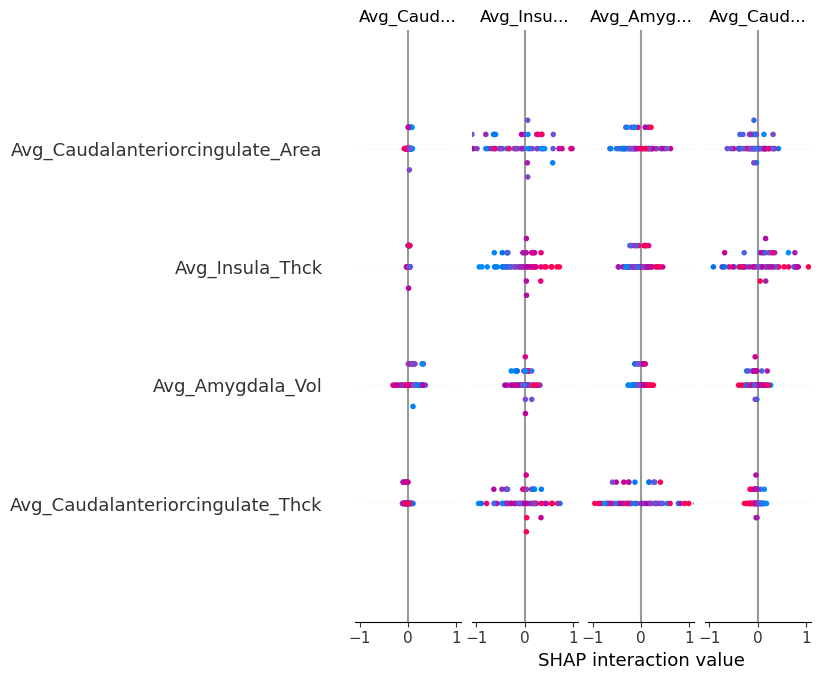

In [188]:
# Create a SHAP explainer
explainer = shap.Explainer(linear_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Plot the SHAP values for the first output (e.g., negative)
shap.summary_plot(shap_values, X_test, feature_names=processed_df.columns)


# MLP

In [189]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import shap

# Assuming processed_df and combined_labels are already defined

# Convert combined_labels to a NumPy array
combined_labels = np.array(combined_labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(processed_df.values, combined_labels, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

In [190]:
# Define a single-output MLP Model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)  # Single output
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Check if GPU is available and use it if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss function, and optimizer
input_size = processed_df.shape[1]
hidden_size = 64

In [191]:
# Function to train a single model
def train_single_model(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, input_size, hidden_size, num_epochs=50, patience=7):
    model = MLP(input_size, hidden_size).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    best_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False
    train_losses = []
    test_losses = []
    test_r2_scores = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Evaluate on test set
        model.eval()
        test_loss = 0.0
        y_true = []
        y_pred = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item() * inputs.size(0)
                y_true.append(labels.cpu().numpy())
                y_pred.append(outputs.cpu().numpy())

        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)

        # Calculate R² score
        y_true = np.vstack(y_true)
        y_pred = np.vstack(y_pred)
        r2 = r2_score(y_true, y_pred)
        test_r2_scores.append(r2)

        scheduler.step(test_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}, Test R²: {r2:.4f}")

        # Early stopping
        if test_loss < best_loss:
            best_loss = test_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping!')
            early_stop = True
            break

    return model, train_losses, test_losses, test_r2_scores

In [192]:
# Train and evaluate models for each dimension
models = []
train_losses_all = []
test_losses_all = []
test_r2_scores_all = []

for i in range(4):
    print(f"Training model for dimension {i+1}")
    y_train_tensor = torch.tensor(y_train[:, i], dtype=torch.float32).unsqueeze(1)
    y_test_tensor = torch.tensor(y_test[:, i], dtype=torch.float32).unsqueeze(1)
    
    model, train_losses, test_losses, test_r2_scores = train_single_model(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, input_size, hidden_size)
    
    models.append(model)
    train_losses_all.append(train_losses)
    test_losses_all.append(test_losses)
    test_r2_scores_all.append(test_r2_scores)


Training model for dimension 1
Epoch 1/50, Training Loss: 4028926003.2138, Test Loss: 1152890491.5862, Test R²: -36679578.2067
Epoch 2/50, Training Loss: 633926396.6436, Test Loss: 24337462.0690, Test R²: -774303.1282
Epoch 3/50, Training Loss: 107581182.2419, Test Loss: 10824988.9655, Test R²: -344399.4674
Epoch 4/50, Training Loss: 15046940.9309, Test Loss: 9141605.3793, Test R²: -290842.0762
Epoch 5/50, Training Loss: 3295519.5502, Test Loss: 2947479.5259, Test R²: -93773.9997
Epoch 6/50, Training Loss: 857924.5317, Test Loss: 697167.5582, Test R²: -22179.6085
Epoch 7/50, Training Loss: 202960.7551, Test Loss: 150073.0690, Test R²: -4773.6225
Epoch 8/50, Training Loss: 43088.3930, Test Loss: 27694.7038, Test R²: -880.1158
Epoch 9/50, Training Loss: 8899.6206, Test Loss: 5160.3983, Test R²: -163.1797
Epoch 10/50, Training Loss: 1746.3127, Test Loss: 420.9301, Test R²: -12.3920
Epoch 11/50, Training Loss: 424.6697, Test Loss: 148.4312, Test R²: -3.7224
Epoch 12/50, Training Loss: 184.

In [ ]:
# Plot train/test losses and R² scores for each model
for i in range(4):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses_all[i], label='Train Loss')
    plt.plot(test_losses_all[i], label='Test Loss', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Train and Test Loss for Dimension {i+1}')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(test_r2_scores_all[i], label='Test R² Score', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('R² Score')
    plt.title(f'Test R² Score for Dimension {i+1}')
    plt.legend()
    plt.show()

In [170]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from torch.utils.data import DataLoader, TensorDataset

# Assuming processed_df and combined_labels are already defined

# Convert combined_labels to a NumPy array
combined_labels = np.array(combined_labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(processed_df.values, combined_labels, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [171]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class EnhancedMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(EnhancedMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(p=0.5)  # Adding dropout for regularization
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = processed_df.shape[1]
hidden_size = 128  # Increased hidden size
output_size = 1

model = EnhancedMLP(input_size, hidden_size, output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)  # L2 regularization
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)



In [172]:
def train_enhanced_model(train_loader, test_loader, model, criterion, optimizer, scheduler, num_epochs=50, patience=7):
    best_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False
    train_losses = []
    test_losses = []
    test_r2_scores = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        
        # Evaluate on test set
        model.eval()
        test_loss = 0.0
        y_true = []
        y_pred = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item() * inputs.size(0)
                y_true.append(labels.cpu().numpy())
                y_pred.append(outputs.cpu().numpy())
        
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        
        # Calculate R² score
        y_true = np.vstack(y_true)
        y_pred = np.vstack(y_pred)
        r2 = r2_score(y_true, y_pred)
        test_r2_scores.append(r2)
        
        scheduler.step(test_loss)
        
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}, Test R²: {r2:.4f}")
        
        # Early stopping
        if test_loss < best_loss:
            best_loss = test_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping!')
            early_stop = True
            break
    
    return model, train_losses, test_losses, test_r2_scores

# Train the enhanced model
num_epochs = 2000
patience = 7
model, train_losses, test_losses, test_r2_scores = train_enhanced_model(train_loader, test_loader, model, criterion, optimizer, scheduler, num_epochs=num_epochs, patience=patience)


/var/local/miniconda3/envs/rapids-23.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/var/local/miniconda3/envs/rapids-23.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/var/local/miniconda3/envs/rapids-23.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 32 and the array at index 3 has size 20

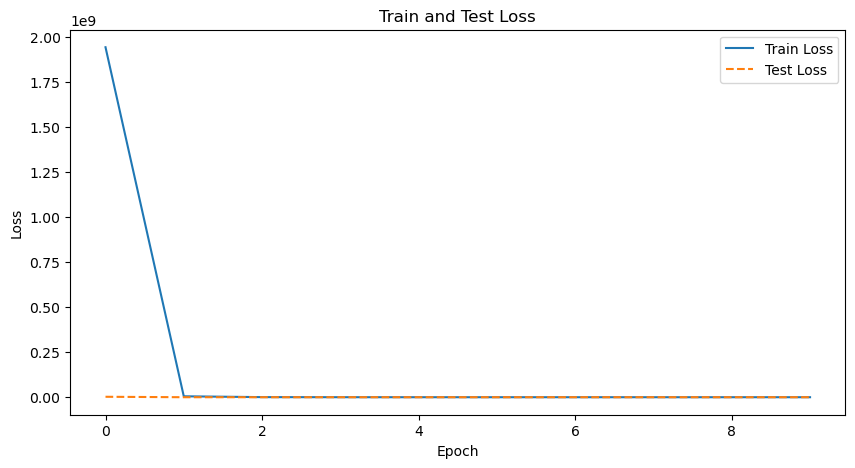

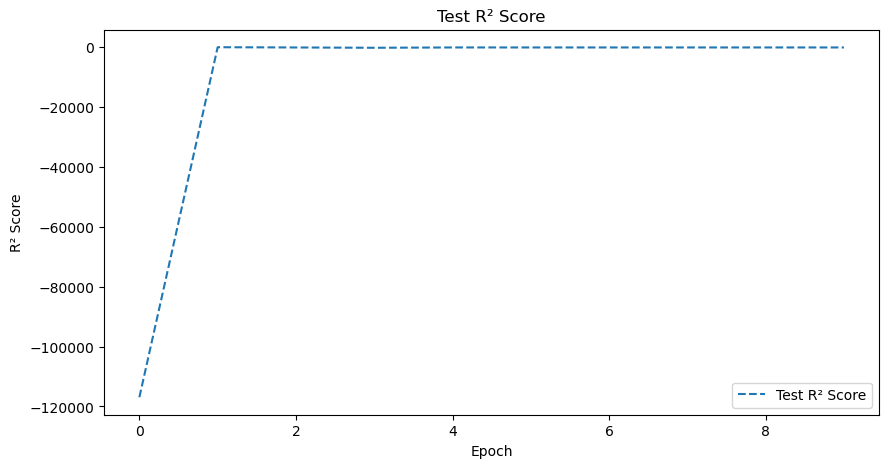

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(test_r2_scores, label='Test R² Score', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.title('Test R² Score')
plt.legend()
plt.show()

In [165]:
import shap

# Create a SHAP explainer using GradientExplainer
explainer = shap.GradientExplainer(model, X_train_tensor.to(device))

# Explain the model's predictions on the test set
shap_values = explainer.shap_values(X_test_tensor.to(device))

# Plot the SHAP values for the first output (e.g., negative)
shap.summary_plot(shap_values[0], X_test_tensor.cpu().numpy(), feature_names=processed_df.columns)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.